[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0531
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8743e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5103e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5121e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3980e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3105e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4055e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1816e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1796e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2844e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2267e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2863e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0392e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1375e-04
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7

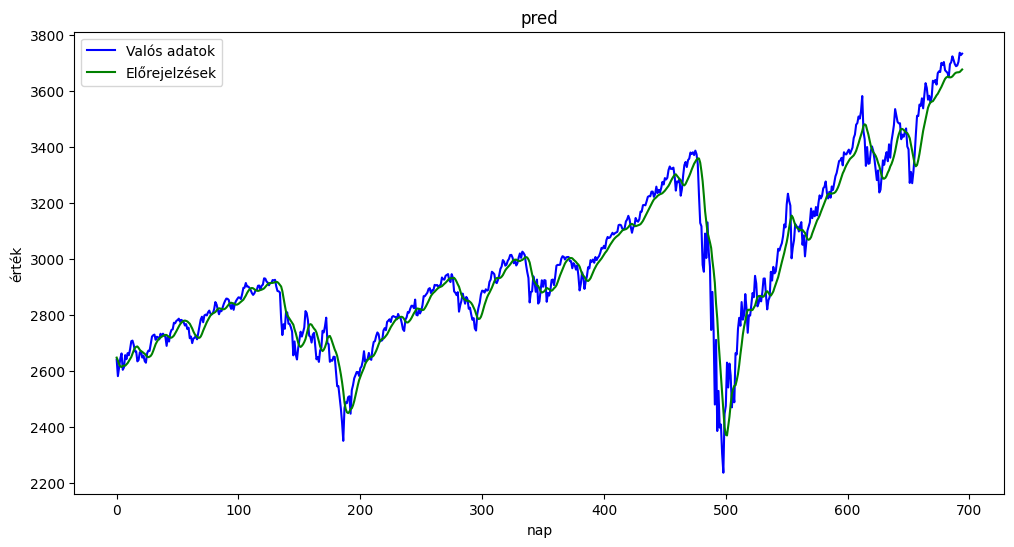

In [2]:

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


window_size = 60


all = yf.download('^GSPC', start='2000-01-01', end='2020-12-31')['Close']
train = all[:'2017-12-31']
test = all['2018-01-01':'2020-12-31']
s = MinMaxScaler(feature_range=(0, 1))
strain = s.fit_transform(train.values.reshape(-1, 1))
stest = s.transform(test.values.reshape(-1, 1))


def create_dataset(all, window_size):
    X, y = [], []
    for i in range(window_size, len(all)):
        X.append(all[i - window_size:i, 0])
        y.append(all[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(strain, window_size)
X_test, y_test = create_dataset(stest, window_size)
X_train2 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test2 = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

modelstm = Sequential()
modelstm.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
modelstm.add(LSTM(50))
modelstm.add(Dense(1))

modelstm.compile(optimizer='adam', loss='mean_squared_error')
modelstm.fit(X_train2, y_train, epochs=50, batch_size=128, verbose=1)

predict = modelstm.predict(X_test2)
predict2 = s.inverse_transform(predict)
realdata = s.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(realdata, predict2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(realdata, predict2)
rsq = r2_score(realdata, predict2)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {rsq}")
plt.figure(figsize=(12, 6))
plt.plot(realdata, label='Valós adatok', color='blue')
plt.plot(predict2, label='Előrejelzések', color='green')
plt.xlabel('nap')
plt.ylabel('érték')
plt.legend()
plt.title('pred')
plt.show()
